In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
plt.rcParams.update({'font.size': 15}) 

## Random neural network:

$$\dot x_i(t) = -x_i(t) + \sum_j^N J_{ij}f(x_j(t)) + I_i$$

Here $x_i$ is a total input current to the neuron $i$, $J$ is a connectivity matrix, $I_i$ is the external, feedforward input to neuron $i$. The number of neurons $N$ is equal 100. Function $f(x)$  the current-to-rate transfer function:


$$f(x_j(t)) = \tanh(gx_j(t))$$

Sompolinsky, Haim, Andrea Crisanti, and Hans-Jurgen Sommers. "Chaos in random neural networks." Physical review letters 61.3 (1988): 259.

In [3]:
def RNN(x, J, N, g, I=0):
    f = np.tanh(g  * x)    
    dx = -x + 1 / N * J.dot(f) + I
    return dx

### Euler Scheme for integration:

In [4]:
def run(x0, args, T, STEP, noise=0):
    x = [x0]

    for t in np.arange(0, T, STEP):
        
        dx = RNN(x[-1], *args)
        x.append(x[-1] + dx * STEP + noise * np.random.randn(len(dx)) * STEP ** .5)
    return np.array(x)

In [5]:
STEP = 1e-2 
T = 10 

N = 100 
x0 = np.random.randn(N) 

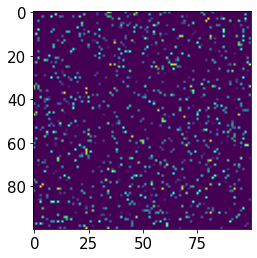

In [6]:
G = nx.watts_strogatz_graph(N, 10, 1) # small world graph

for (u,v,w) in G.edges(data=True):
    w['weight'] = np.random.randint(0, 10) 

J = np.array(nx.adjacency_matrix(G).todense()) 

plt.figure()
plt.imshow(J)
plt.show()

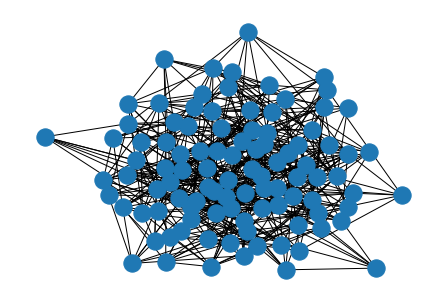

In [7]:
nx.draw(G, with_labels=False)

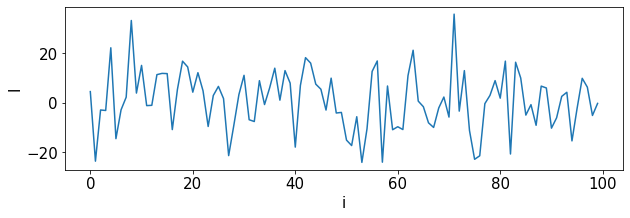

In [8]:
g = 1
T = 100
I = np.random.randn(N) * 10

plt.figure(figsize=(10, 3))
plt.plot(I)
plt.ylabel('I')
plt.xlabel('i')
plt.show()

args = (J, N, g, I)
x = run(x0, args, T, STEP, noise=1)

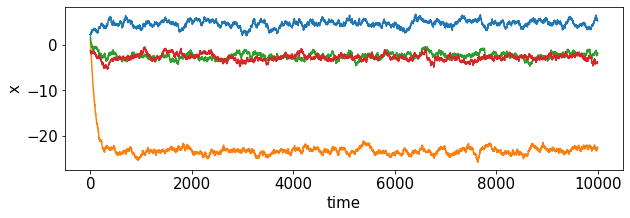

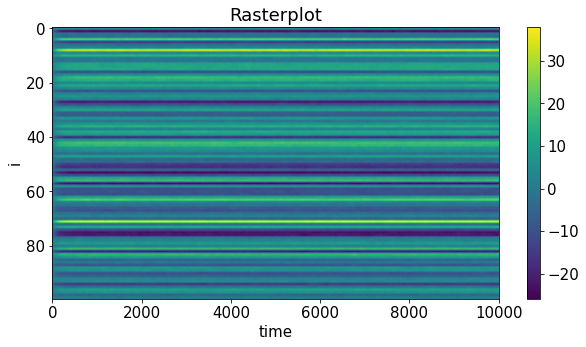

In [9]:
plt.figure(figsize=(10, 3))
plt.plot(x[:, :4])
plt.ylabel('x')
plt.xlabel('time')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(x[:, :].T, aspect='auto')          
plt.ylabel('i')
plt.xlabel("time")
plt.title('Rasterplot')
plt.colorbar()
plt.show()

# Generalization

$$ \frac{d\mathbf{x}}{dt} = -D\mathbf{x} + W\tanh(\mathbf{x}) + I $$

In [10]:
def HNN(x, D, W, N, I=0):
    f = np.tanh(x)    
    dx = -D.dot(x) + W.dot(f) + I 
    return dx

In [11]:
def run_HNN(x0, args, T, STEP, noise=0):
    x = [x0]

    for t in np.arange(0, T, STEP):
        
        dx = HNN(x[-1], *args)
        x.append(x[-1] + dx * STEP + noise * np.random.randn(len(dx)) * STEP ** .5)
    return np.array(x)

In [12]:
STEP = 1e-2
T = 10

N = 100
x0 = np.random.randn(N)

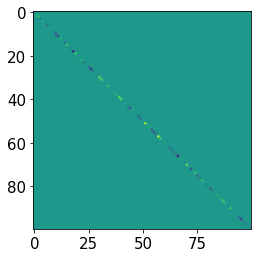

In [13]:
D = np.eye(N) * np.random.randn(N) * .01
# D = np.diag(np.random.randn(N) * .1)

plt.figure()
plt.imshow(D)
plt.show()

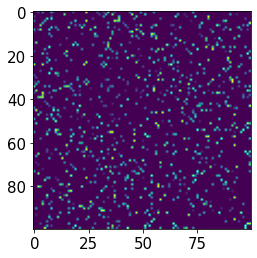

In [14]:
G = nx.erdos_renyi_graph(N, .1)

for (u,v,w) in G.edges(data=True):
    w['weight'] = .01 *  np.random.randint(0, 10)

W = np.array(nx.adjacency_matrix(G).todense())


plt.figure()
plt.imshow(W)
plt.show()

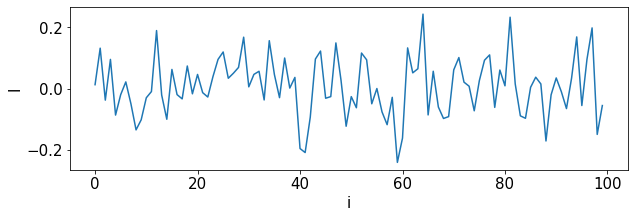

In [15]:
I = np.random.randn(N) * .1

plt.figure(figsize=(10, 3))
plt.plot(I)
plt.ylabel('I')
plt.xlabel('i')
plt.show()

args = (D, W, N, I)
x = run_HNN(x0, args, T, STEP, noise=10)

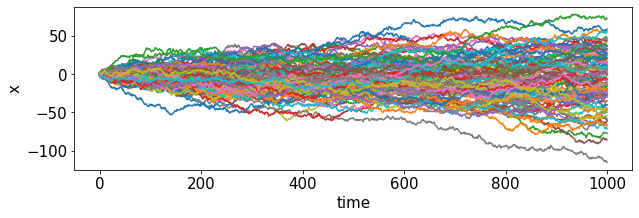

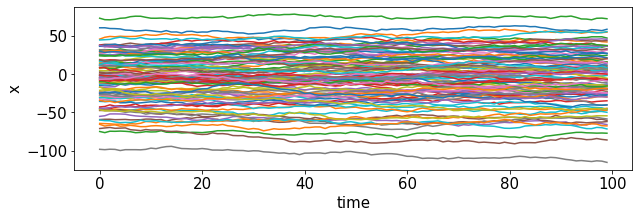

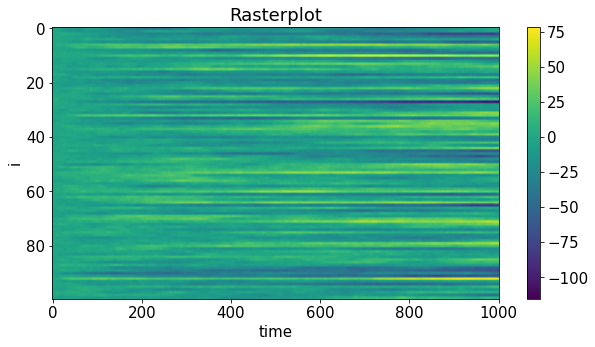

In [16]:
plt.figure(figsize=(10, 3))
plt.plot(x[:, :])
plt.ylabel('x')
plt.xlabel('time')
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(x[-100:, :])
plt.ylabel('x')
plt.xlabel('time')
plt.show()


plt.figure(figsize=(10, 5))
plt.imshow(x[:, :].T, aspect='auto')          
plt.ylabel('i')
plt.xlabel("time")
plt.title('Rasterplot')
plt.colorbar()
plt.show()